In [1]:
# Dependencies
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data frame for combusion engine cars
sales_df=pd.read_csv("ev_sales.csv")
sales_df

,Month,BEV,PHEV,HEV,Total LDV
0,Dec-10,19,326,28592,1144840
1,Jan-11,103,321,19540,819938
2,Feb-11,83,281,23306,993535
3,Mar-11,298,608,34533,1246668
4,Apr-11,573,493,25602,1157928
...,...,...,...,...,...
153,Sep-23,101719,29632,109269,1331167
154,Oct-23,90509,22037,103799,1193974
155,Nov-23,102323,24530,108549,1235583
156,Dec-23,121647,41121,117098,1458853


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      158 non-null    object
 1   BEV        158 non-null    int64 
 2   PHEV       158 non-null    object
 3   HEV        158 non-null    object
 4   Total LDV  158 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.3+ KB


In [4]:
sales_df['HEV'] = sales_df['HEV'].astype(int)
sales_df['Total LDV'] = sales_df['Total LDV'].astype(int)
sales_df['PHEV']= sales_df['PHEV'].astype(int)

In [5]:
sales_df['Month'] = pd.to_datetime(sales_df['Month'].replace({'-': ' 20',}, regex=True))+ pd.offsets.MonthEnd()
sales_df.head()

/var/folders/8g/_59nxjb17b31nskgc0pjzb_80000gn/T/ipykernel_10547/4133233227.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df['Month'] = pd.to_datetime(sales_df['Month'].replace({'-': ' 20',}, regex=True))+ pd.offsets.MonthEnd()


,Month,BEV,PHEV,HEV,Total LDV
0,2010-12-31,19,326,28592,1144840
1,2011-01-31,103,321,19540,819938
2,2011-02-28,83,281,23306,993535
3,2011-03-31,298,608,34533,1246668
4,2011-04-30,573,493,25602,1157928


In [6]:
sales_df.rename({'Month':'Date'}, inplace = True, axis='columns')
sales_df

,Date,BEV,PHEV,HEV,Total LDV
0,2010-12-31,19,326,28592,1144840
1,2011-01-31,103,321,19540,819938
2,2011-02-28,83,281,23306,993535
3,2011-03-31,298,608,34533,1246668
4,2011-04-30,573,493,25602,1157928
...,...,...,...,...,...
153,2023-09-30,101719,29632,109269,1331167
154,2023-10-31,90509,22037,103799,1193974
155,2023-11-30,102323,24530,108549,1235583
156,2023-12-31,121647,41121,117098,1458853


In [7]:
#import data frame for combusion engine cars
gas_df=pd.read_csv("gas_prices.csv")
gas_df

,Date,U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,Aug-1990,NaN
1,Sep-1990,1.258
2,Oct-1990,1.335
3,Nov-1990,1.324
4,Dec-1990,NaN
...,...,...
398,Oct-2023,3.613
399,Nov-2023,3.318
400,Dec-2023,3.134
401,Jan-2024,3.075


In [8]:
gas_df = gas_df[1:-1]

In [9]:
gas_df['Date'] = pd.to_datetime(gas_df['Date'].replace({'-': ' ',}, regex=True))+ pd.offsets.MonthEnd()
gas_df.head()

/var/folders/8g/_59nxjb17b31nskgc0pjzb_80000gn/T/ipykernel_10547/305087419.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gas_df['Date'] = pd.to_datetime(gas_df['Date'].replace({'-': ' ',}, regex=True))+ pd.offsets.MonthEnd()
/var/folders/8g/_59nxjb17b31nskgc0pjzb_80000gn/T/ipykernel_10547/305087419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_df['Date'] = pd.to_datetime(gas_df['Date'].replace({'-': ' ',}, regex=True))+ pd.offsets.MonthEnd()


,Date,U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
1,1990-09-30,1.258
2,1990-10-31,1.335
3,1990-11-30,1.324
4,1990-12-31,NaN
5,1991-01-31,NaN


In [10]:
sale_gas_df = gas_df.copy()
sale_gas_df['Date'] = sale_gas_df['Date'] + pd.DateOffset(months=1)
sale_gas_df = sale_gas_df.merge(sales_df,  how='inner', on='Date')
sale_gas_df['Date'] = pd.to_datetime(sale_gas_df['Date'])
sale_gas_df

,Date,U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),BEV,PHEV,HEV,Total LDV
0,2011-01-31,2.993,103,321,19540,819938
1,2011-02-28,3.095,83,281,23306,993535
2,2011-04-30,3.561,573,493,25602,1157928
3,2011-06-30,3.906,1708,561,12655,1053414
4,2011-08-31,3.650,1363,302,21181,1072379
...,...,...,...,...,...,...
87,2023-06-30,3.555,100745,23181,100762,1368178
88,2023-08-31,3.597,92277,28148,107325,1316366
89,2023-09-30,3.840,101719,29632,109269,1331167
90,2023-11-30,3.613,102323,24530,108549,1235583


In [11]:
sale_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Date                                                                       92 non-null     datetime64[ns]
 1   U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)  92 non-null     float64       
 2   BEV                                                                        92 non-null     int64         
 3   PHEV                                                                       92 non-null     int64         
 4   HEV                                                                        92 non-null     int64         
 5   Total LDV                                                                  92 non-null     int64         
dtypes: da

In [12]:
sale_gas_df['U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)'].corr(sale_gas_df['BEV'])

0.3418698576002183

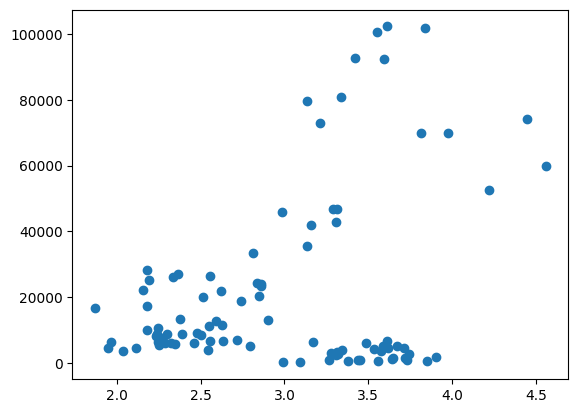

In [13]:
plt.scatter(sale_gas_df['U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)'], 
                        sale_gas_df['BEV'])

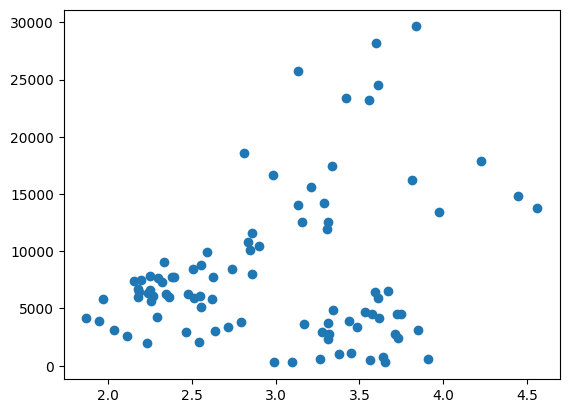

In [14]:
plt.scatter(sale_gas_df['U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)'],
            sale_gas_df['PHEV'])

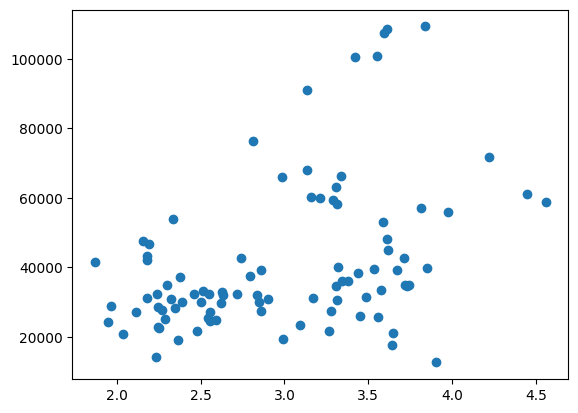

In [15]:
plt.scatter(sale_gas_df['U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)'],
            sale_gas_df['HEV'])

In [16]:
sale_gas_df.rename({'Date':'time'}, inplace = True, axis='columns')
sale_gas_df.set_index("time")

,U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),BEV,PHEV,HEV,Total LDV
time,,,,,
2011-01-31,2.993,103,321,19540,819938
2011-02-28,3.095,83,281,23306,993535
2011-04-30,3.561,573,493,25602,1157928
2011-06-30,3.906,1708,561,12655,1053414
2011-08-31,3.650,1363,302,21181,1072379
...,...,...,...,...,...
2023-06-30,3.555,100745,23181,100762,1368178
2023-08-31,3.597,92277,28148,107325,1316366
2023-09-30,3.840,101719,29632,109269,1331167


In [17]:
sale_gas_df["gas price*10000"]=sale_gas_df['U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)']*10000

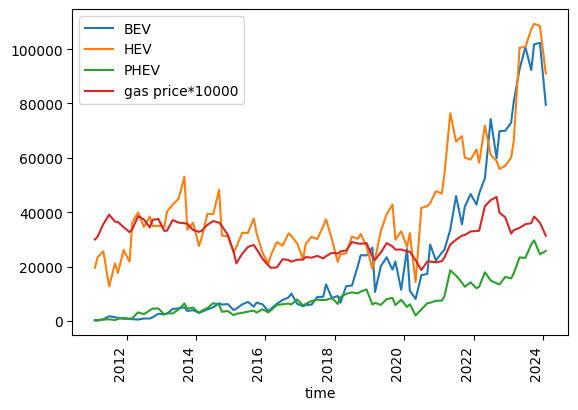

In [18]:
sale_gas_df.plot(x='time', y=['BEV',"HEV",'PHEV',"gas price*10000"], kind='line', rot='vertical');
plt.show()

In [19]:
sale_gas_subset = sale_gas_df[sale_gas_df['time']>="2015-01-01"]
sale_gas_subset.size

448

In [20]:
sale_gas_subset[['U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)','BEV','HEV','PHEV','Total LDV']].corr()

,U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),BEV,HEV,PHEV,Total LDV
U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),1.000000,0.807583,0.701751,0.743060,-0.239113
BEV,0.807583,1.000000,0.914043,0.915061,-0.314278
HEV,0.701751,0.914043,1.000000,0.928127,-0.160970
PHEV,0.743060,0.915061,0.928127,1.000000,-0.128922
Total LDV,-0.239113,-0.314278,-0.160970,-0.128922,1.000000
